# Exploratory Data Analyisis for Togo dataset

In [1]:
import sys
sys.path.append('../scripts')


In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
from utils import negative_values, missing_values

In [3]:
# Load_data
df = pd.read_csv('../data/raw/togo.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## Summary Statistics 

In [5]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [6]:
df.shape

(525600, 19)

In [7]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

## Data Quality Check 

In [4]:
# Missing values 
missing_values(df)




['Comments']
Comments 100.0  % of missing values


In [5]:
# Incorrect_entries 

# Columns with negative values
column_negative =negative_values(df)
column_negative

['GHI']


In [6]:
# Check for Outliers 

outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

check_list = ['ModA', 'ModB', 'WS', 'WSgust']
for i in df[check_list]:
  outlier_pt=detect_outliers(df[i])
  sorted_outliers=sorted(outlier_pt)
  print('number of outliers in ', i, len(outlier_pt))
  print(outlier_pt)


number of outliers in  ModA 137
[1194.0, 1185.0, 1184.0, 1185.0, 1195.0, 1206.0, 1191.0, 1183.0, 1251.0, 1182.0, 1193.0, 1237.0, 1276.0, 1214.0, 1210.0, 1209.0, 1243.0, 1182.0, 1252.0, 1191.0, 1305.0, 1215.0, 1205.0, 1179.0, 1202.0, 1233.0, 1184.0, 1222.0, 1299.0, 1227.0, 1220.0, 1325.0, 1327.0, 1188.0, 1185.0, 1179.0, 1246.0, 1209.0, 1186.0, 1188.0, 1252.0, 1194.0, 1221.0, 1228.0, 1278.0, 1260.0, 1201.0, 1289.0, 1287.0, 1182.0, 1188.0, 1205.0, 1224.0, 1179.0, 1195.0, 1254.0, 1228.0, 1251.0, 1241.0, 1201.0, 1201.0, 1363.0, 1374.0, 1357.0, 1291.0, 1198.0, 1192.0, 1198.0, 1226.0, 1183.0, 1187.0, 1207.0, 1239.0, 1199.0, 1217.0, 1198.0, 1211.0, 1219.0, 1203.0, 1225.0, 1202.0, 1192.0, 1184.0, 1189.0, 1215.0, 1209.0, 1190.0, 1380.0, 1182.0, 1285.0, 1278.0, 1190.0, 1217.0, 1292.0, 1194.0, 1192.0, 1183.0, 1187.0, 1187.0, 1186.0, 1183.0, 1207.0, 1192.0, 1190.0, 1181.0, 1180.0, 1240.0, 1214.0, 1201.0, 1189.0, 1215.0, 1184.0, 1211.0, 1198.0, 1195.0, 1186.0, 1188.0, 1211.0, 1221.0, 1229.0, 1227.0,

## Data Cleaning 

In [7]:
# missing value
dff = df.dropna(axis=1)
# negative values 
## we have found the column with negative values is GHI 

dff.loc[dff['GHI'] < 0, 'GHI'] = 0


In [8]:
dff.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


In [11]:
# For analysis of time series we change the object datatype of timestamp to datetime 

# Convert to datetime64[ns] data type
dff['Timestamp']= pd.to_datetime(dff['Timestamp'])

# Format the 'date' column using dt.strftime()
dff['formatted_date'] = dff['Timestamp'].dt.strftime('%Y-%m-%d %H:%M')

# Reindex the DataFrame using the 'date' column
dff = dff.set_index('Timestamp')


In [10]:
dff.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,formatted_date
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,2021-10-25 00:01
2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,2021-10-25 00:02
2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,2021-10-25 00:03
2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,2021-10-25 00:04
2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,2021-10-25 00:05


## Time Series Analysis 

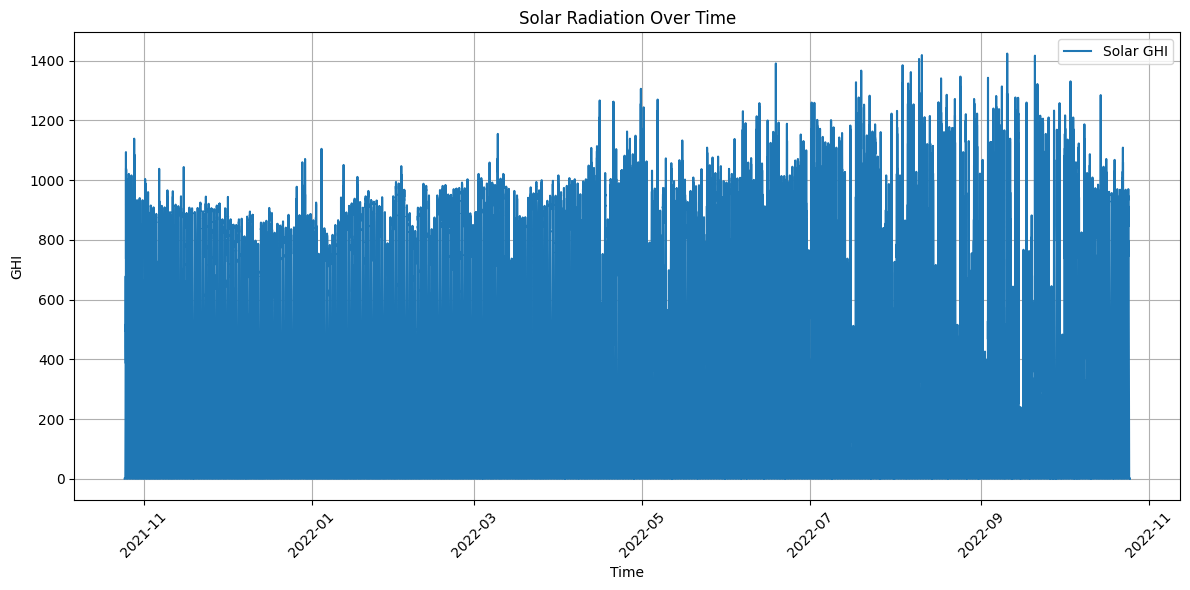

In [12]:
# For GHI
plt.figure(figsize=(12, 6))
plt.plot(dff.index, dff['GHI'], label='Solar GHI')
plt.title('Solar Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

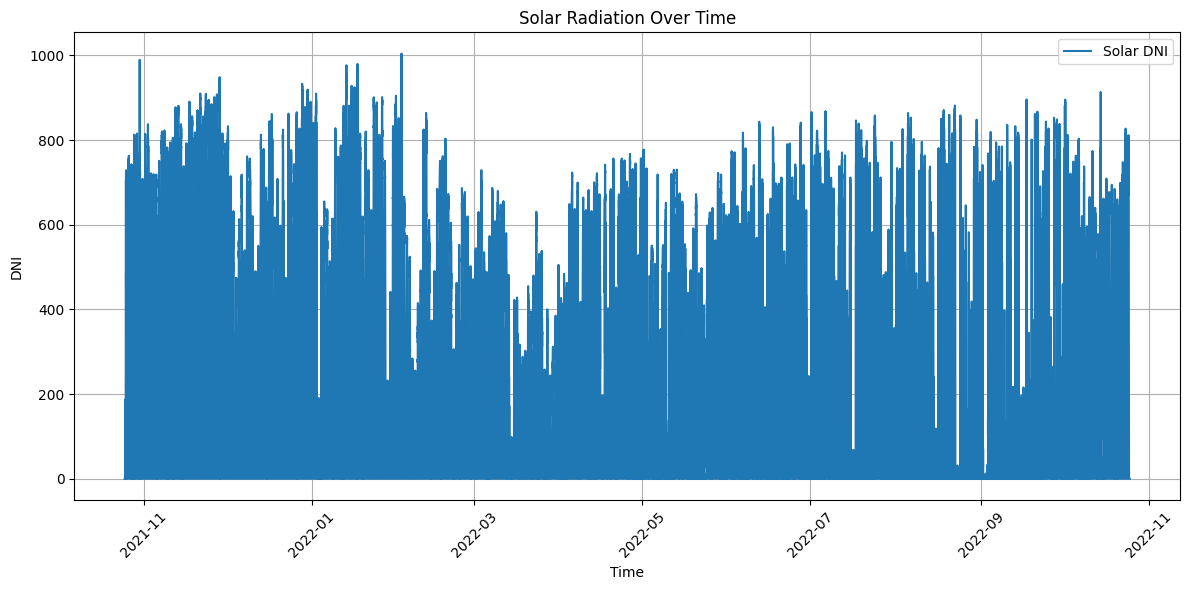

In [14]:
# For DNI
plt.figure(figsize=(12, 6))
plt.plot(dff.index, dff['DNI'], label='Solar DNI')
plt.title('Solar Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# For DHI
plt.figure(figsize=(12, 6))
plt.plot(dff.index, dff['DHI'], label='Solar DHI')
plt.title('Solar Radiation Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

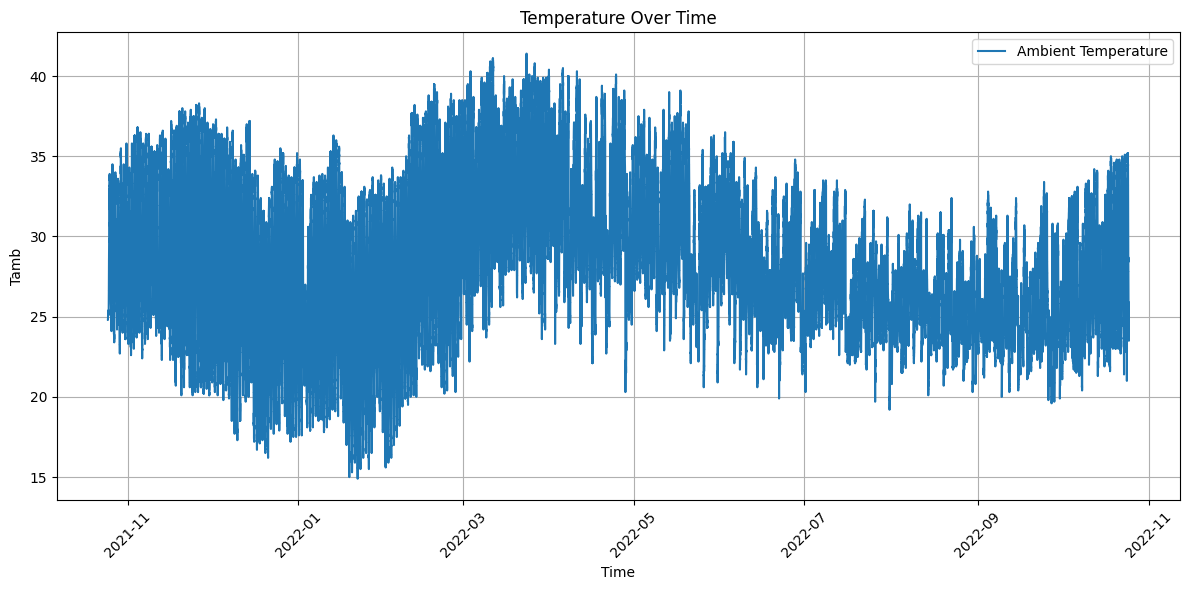

In [15]:
# For Tamb
plt.figure(figsize=(12, 6))
plt.plot(dff.index, dff['Tamb'], label='Ambient Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis

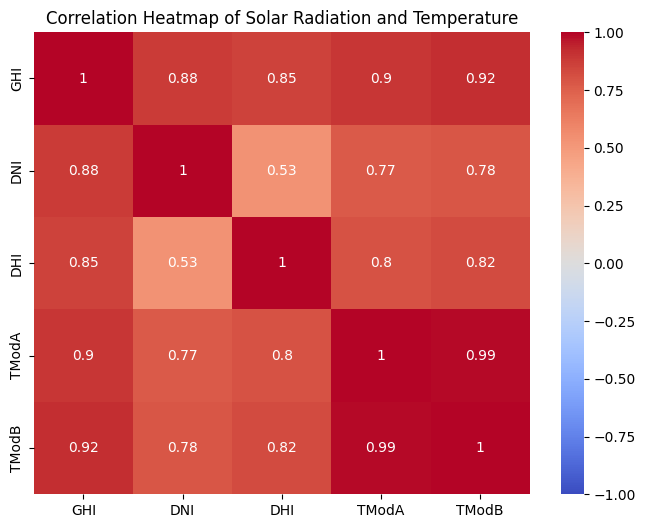

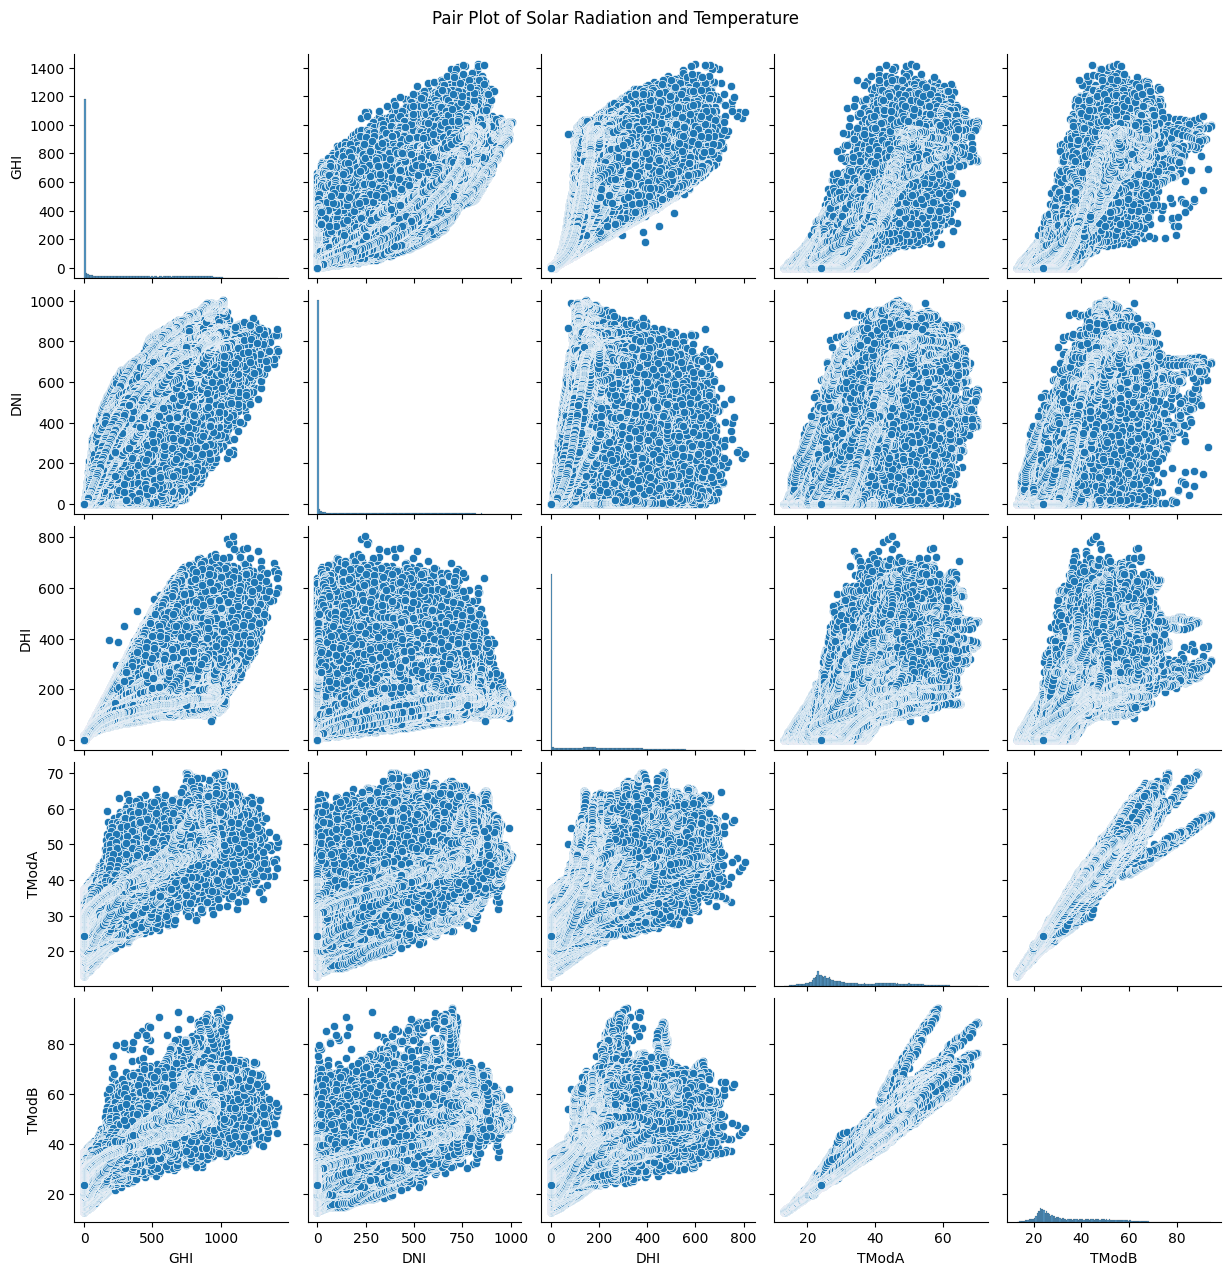

In [18]:

# Select relevant columns for correlation analysis
subset_df = dff[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Solar Radiation and Temperature')
plt.show()

# Create a pair plot
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Solar Radiation and Temperature', y=1.02)
plt.show()

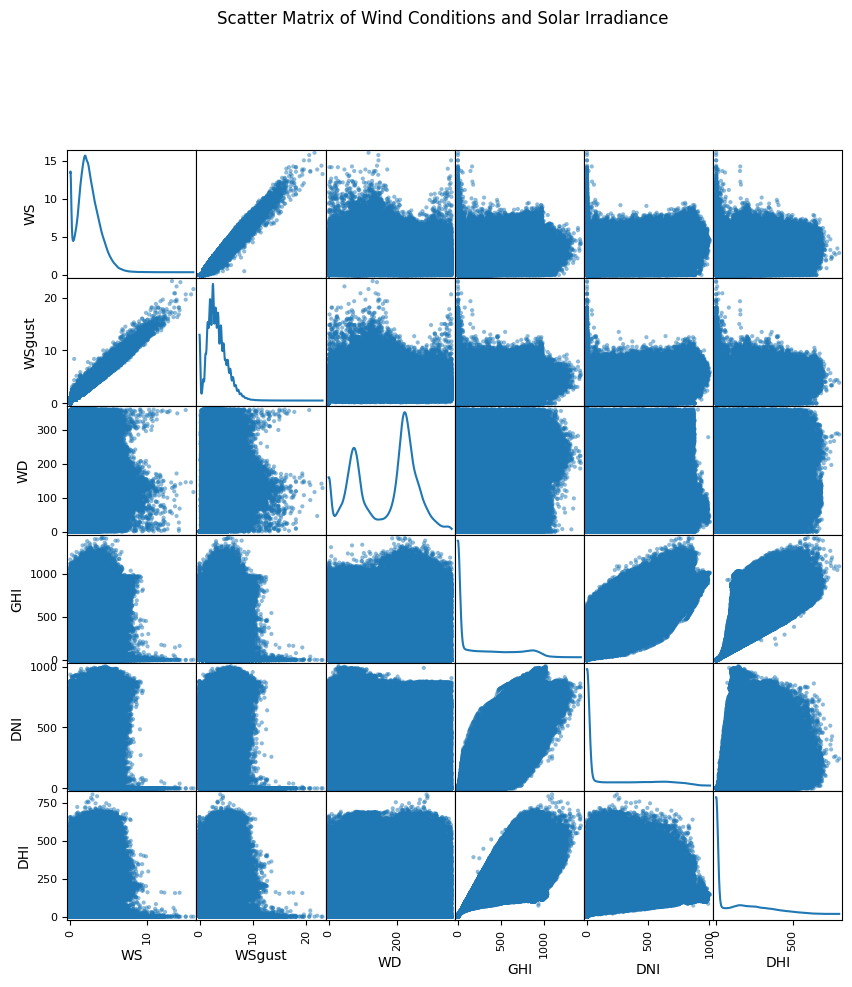

In [24]:
# Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices

# Select columns for analysis
wind_solar_rn = dff[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']]

# Create a scatter matrix
scatter_matrix(wind_solar_rn, alpha=0.5, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

## Wind Analysis 

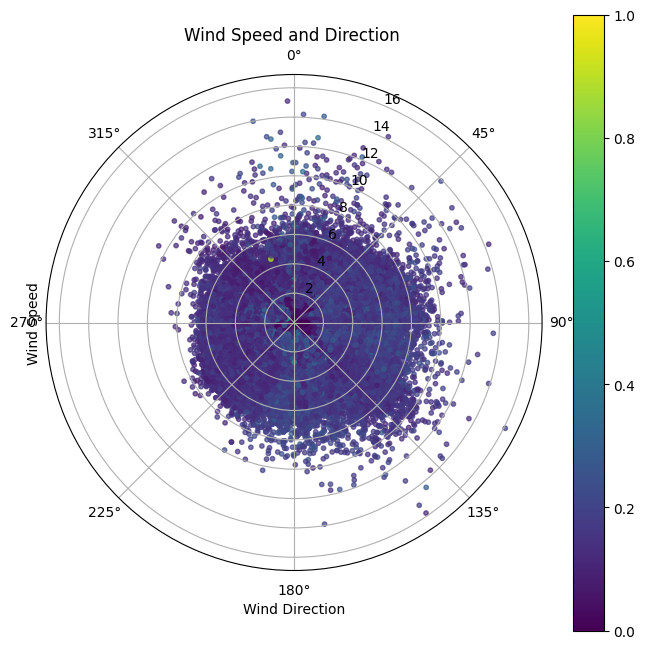

In [27]:
# Identify trends and significant wind events using Polar plots
# Extract wind speed, wind gust, and wind direction data
ws = dff['WS'].values
wd = dff['WD'].values
wdstd = dff['WDstdev'].values
wsstd = dff['WSstdev'].values

# Calculate wind direction variability (standard deviation)
wd_std = np.zeros_like(wd)  # Initialize array for standard deviation
window_size = 24  # Number of hours for the rolling window

for i in range(window_size, len(wd)):
    wd_std[i] = np.std(wd[i - window_size:i])

# Create polar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Plot wind speed and direction
ax.scatter(np.deg2rad(wd), ws, c=wdstd, cmap='viridis', alpha=0.7, s=10)

# Set plot properties
ax.set_theta_zero_location('N')  # Set north at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_title('Wind Speed and Direction ')
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Wind Speed')

# Add colorbar for wind direction variability
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax)


plt.show()

## Temperature Analysis

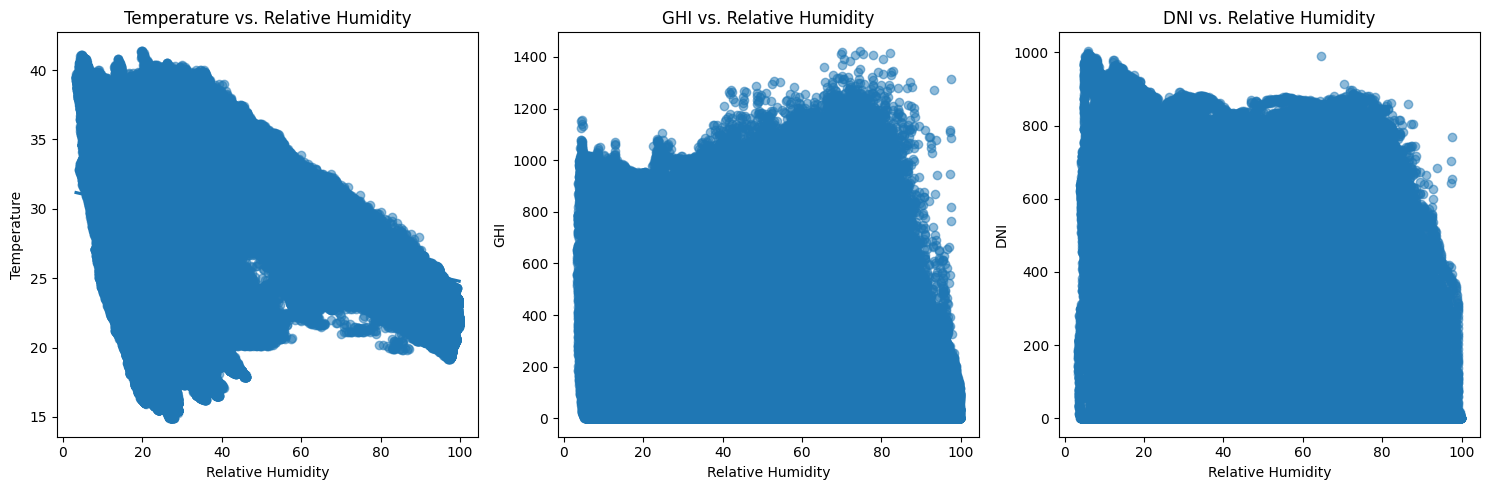

In [33]:
# Create scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature vs. Relative Humidity
sns.regplot(x='RH', y='Tamb', data=dff, ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('Temperature vs. Relative Humidity')
axes[0].set_xlabel('Relative Humidity')
axes[0].set_ylabel('Temperature')

# GHI vs. Relative Humidity
sns.regplot(x='RH', y='GHI', data=dff, ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('GHI vs. Relative Humidity')
axes[1].set_xlabel('Relative Humidity')
axes[1].set_ylabel('GHI')

# DNI vs. Relative Humidity
sns.regplot(x='RH', y='DNI', data=dff, ax=axes[2], scatter_kws={'alpha':0.5})
axes[2].set_title('DNI vs. Relative Humidity')
axes[2].set_xlabel('Relative Humidity')
axes[2].set_ylabel('DNI')


plt.tight_layout()
plt.show()

## Histograms

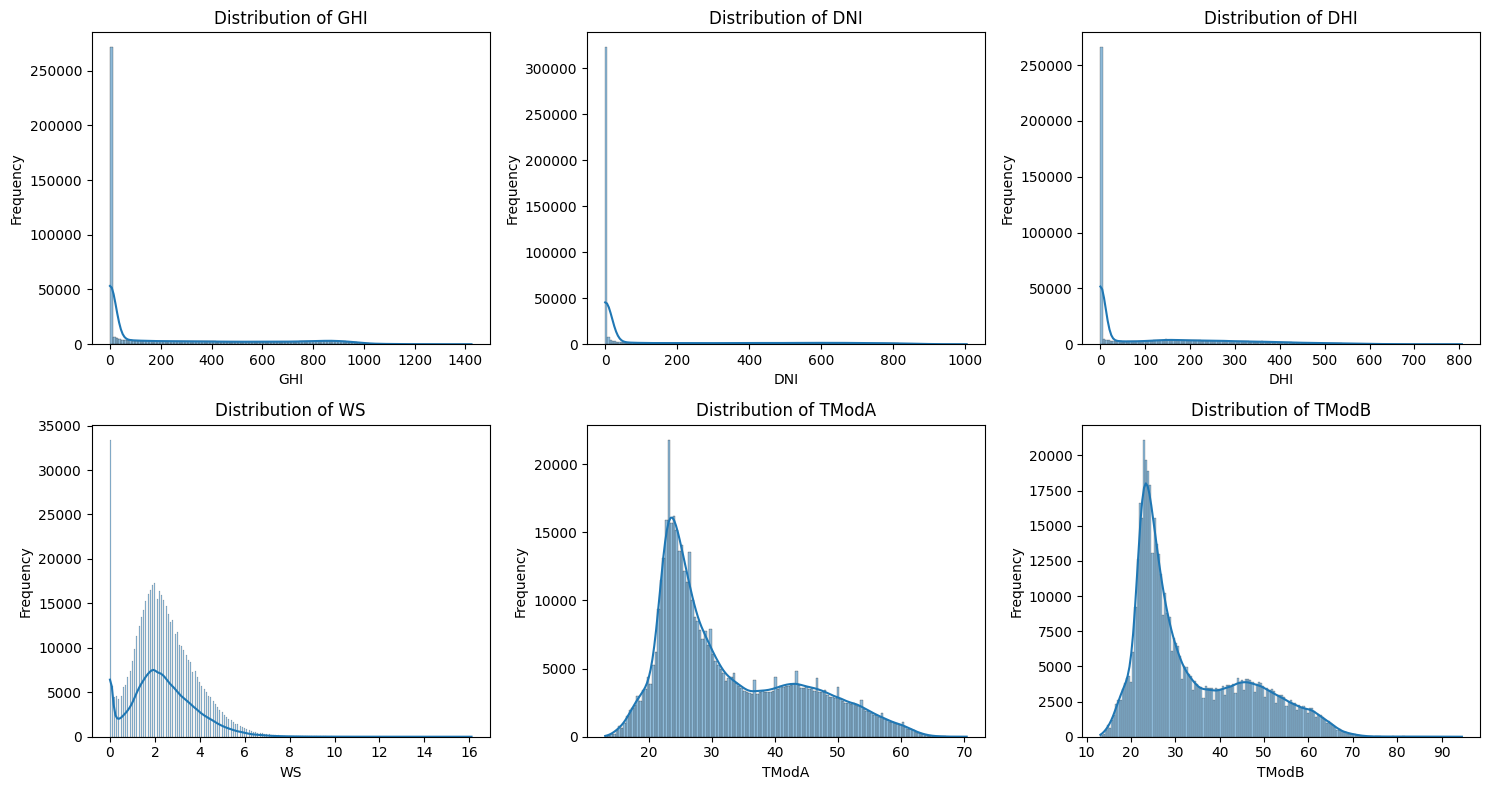

In [32]:
# Select variables for histograms
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

# Create histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(dff[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()